In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading the Excel file

In [35]:
df=pd.read_excel("C:\\Users\\KEY1\\Desktop\\bankruptcy\\bank.xlsx")

# converting objects to float

In [36]:
df=df.apply(pd.to_numeric,errors='coerce')

# deleting the duplicate records

In [37]:
df.drop_duplicates(inplace=True)

# Descriptive statistics of data

In [38]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10082.000000,10082.000000,10082.000000,10061.000000,10059.000000,10082.000000,10082.000000,10065.000000,10079.000000,10082.000000,...,10021.000000,10081.000000,10045.000000,10081.000000,9544.000000,10067.000000,1.002100e+04,10061.000000,9873.000000,10083.000000
mean,0.042574,0.648754,0.070061,4.157701,-146.673278,-0.113624,0.122134,9.922287,2.880716,0.342729,...,-1.138886,-0.043100,12.759592,3.054694,378.491171,16.935163,8.768886e+02,11.266307,54.341955,0.039472
std,1.116511,6.644778,6.635856,51.944887,7842.209864,6.597275,6.561479,289.672105,97.105064,6.685402,...,86.886127,12.305137,635.734487,239.245881,12347.985196,297.061365,4.375515e+04,234.962258,1530.077857,0.194726
min,-75.331000,0.000000,-479.960000,0.002079,-438000.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000
25%,0.000324,0.278078,0.012133,1.029200,-50.182000,0.000000,0.001871,0.392100,1.026950,0.276633,...,0.010307,0.010059,0.872360,0.000000,5.684425,4.702450,4.020100e+01,3.111900,2.319500,0.000000
50%,0.049350,0.487830,0.190130,1.525600,-1.781600,0.000000,0.059801,1.002400,1.290600,0.490840,...,0.054934,0.126880,0.949910,0.004737,10.365000,7.002900,6.952200e+01,5.205000,4.554400,0.000000
75%,0.141492,0.705758,0.400622,2.740900,51.665000,0.072440,0.166238,2.516100,2.266100,0.702527,...,0.133940,0.310150,0.993440,0.249270,22.238500,11.113000,1.162200e+02,9.022600,10.640000,0.000000
max,7.372700,480.960000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,20.200000,147.190000,59672.000000,23853.000000,640000.000000,26862.000000,4.140000e+06,23454.000000,128000.000000,1.000000


# Sum for number of observations with missing values

In [39]:
df.isnull().sum()

Attr1        1
Attr2        1
Attr3        1
Attr4       22
Attr5       24
Attr6        1
Attr7        1
Attr8       18
Attr9        4
Attr10       1
Attr11       1
Attr12      22
Attr13      62
Attr14       1
Attr15      12
Attr16      19
Attr17      18
Attr18       1
Attr19      63
Attr20      62
Attr21    3159
Attr22       1
Attr23      62
Attr24     225
Attr25       1
Attr26      19
Attr27     703
Attr28     210
Attr29       1
Attr30      62
          ... 
Attr36       1
Attr37    4485
Attr38       1
Attr39      62
Attr40      22
Attr41     197
Attr42      62
Attr43      62
Attr44      62
Attr45     537
Attr46      22
Attr47      74
Attr48       2
Attr49      62
Attr50      18
Attr51       1
Attr52      74
Attr53     210
Attr54     210
Attr55       1
Attr56      62
Attr57       2
Attr58      38
Attr59       2
Attr60     539
Attr61      16
Attr62      62
Attr63      22
Attr64     210
class        0
Length: 65, dtype: int64

# Displaying the frequency chart for output variable (bstatus = bankruptcy status)

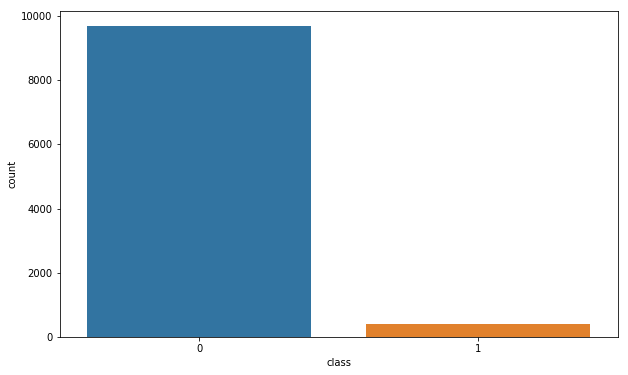

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='class',data = df)

# find the no:of attributes for which the contribution percentage is less than 50

In [41]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [42]:
missing_value_df.sort_values(ascending=False,by='percent_missing')

,column_name,percent_missing
Attr37,Attr37,44.480809
Attr21,Attr21,31.329961
Attr27,Attr27,6.972131
Attr60,Attr60,5.345631
Attr45,Attr45,5.325796
Attr24,Attr24,2.231479
Attr53,Attr53,2.082713
Attr64,Attr64,2.082713
Attr28,Attr28,2.082713
Attr54,Attr54,2.082713


In [43]:
rslt_df = missing_value_df[missing_value_df['percent_missing'] > 50] 

# To find the number of records for which the no:of missing attribute values >80

In [44]:
df.apply(lambda x: x.count(), axis=1)

0        65
1        62
2        63
3        64
4        64
5        65
6        64
7        63
8        64
9        65
10       63
11       63
12       64
13       65
14       65
15       65
16       65
17       64
18       65
19       63
20       64
21       62
22       64
23       65
24       63
25       64
26       63
27       63
28       62
29       65
         ..
10143    65
10144    65
10145    62
10146    64
10147    65
10148    63
10149    57
10150    64
10151    64
10152    63
10153    63
10154    61
10155    61
10156    64
10157    64
10158    63
10159    64
10160    64
10161    63
10162    64
10163    48
10164    65
10165    64
10166    65
10167    64
10168    64
10169    64
10170    64
10171    63
10172    65
Length: 10083, dtype: int64

In [45]:
missing_rowvalues=df.isnull().sum(axis=1)*100/64

In [46]:
missing_rowvalues.sort_values(ascending=False)

7356    56.2500
9228    54.6875
7325    54.6875
7271    54.6875
4569    54.6875
4200    51.5625
8504    51.5625
1832    46.8750
2583    43.7500
7979    39.0625
1251    37.5000
9394    37.5000
5760    35.9375
1111    35.9375
9867    35.9375
6905    35.9375
8876    35.9375
462     35.9375
4545    34.3750
460     34.3750
2560    34.3750
389     34.3750
7036    34.3750
4065    34.3750
8051    34.3750
1821    34.3750
5945    34.3750
1495    34.3750
334     34.3750
7873    32.8125
         ...   
5683     0.0000
5686     0.0000
5689     0.0000
5691     0.0000
5692     0.0000
5694     0.0000
5696     0.0000
5656     0.0000
5655     0.0000
5652     0.0000
5633     0.0000
5617     0.0000
5620     0.0000
5621     0.0000
5623     0.0000
5624     0.0000
5627     0.0000
5629     0.0000
5632     0.0000
5638     0.0000
5651     0.0000
5639     0.0000
5641     0.0000
5642     0.0000
5643     0.0000
5644     0.0000
5646     0.0000
5647     0.0000
5650     0.0000
0        0.0000
Length: 10083, dtype: fl

# To create a new copy of data without class labels for processing further

In [47]:
new_df = df.copy()
new_df.drop(['class'], axis = 1, inplace = True)

# To replace NaN values with mean

In [48]:
new_df=new_df.fillna(new_df.mean())
new_df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.465000,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,243000.0000,0.131840,0.473950,0.868160,0.000240,8.548700,5.16550,107.740000,3.38790,5.344000
1,0.030073,0.595630,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,2179.5000,0.121460,0.074369,0.872350,0.000000,1.526400,0.63305,622.660000,0.58619,1.238100
2,0.257860,0.299490,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,3668.6000,0.164990,0.369210,0.816140,0.000000,4.332500,3.19850,65.215000,5.59690,47.466000
3,0.227160,0.678500,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,1273.8000,0.293580,0.706570,0.786170,0.484560,5.230900,5.06750,142.460000,2.56210,3.006600
4,0.085443,0.380390,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,18209.0000,0.101240,0.163790,0.898760,0.000000,5.703500,4.00200,89.058000,4.09840,5.987400
5,0.287840,0.552250,0.316340,1.70330,38.80300,0.390120,0.287840,0.807610,1.29200,0.446000,...,8040.8000,0.225990,0.645370,0.774010,0.229690,7.815100,3.15340,110.830000,3.29330,6.334600
6,0.153820,0.472480,0.311790,1.68980,-71.98500,0.000000,0.190810,1.116500,1.50460,0.527520,...,9246.0000,0.142170,0.291600,0.873680,0.030421,2.673400,7.80930,109.640000,3.32910,6.369200
7,0.262520,0.458340,0.417040,1.94060,47.51100,0.000000,0.262520,1.181800,2.18540,0.541660,...,1757.0000,0.625180,0.484660,0.385900,0.000000,7.769600,4.57600,74.055000,4.92880,15.658000
8,0.079147,0.022400,0.897050,283.12000,139.75000,0.000000,0.097916,43.643000,0.61657,0.977600,...,16992.0000,0.168460,0.080961,0.860610,0.014807,14.218000,79.20300,1.882300,193.91000,6.179800
9,0.009901,0.711740,0.065186,1.14850,-62.29700,0.000000,0.013459,0.405000,1.17380,0.288260,...,1.1485,0.203090,0.034347,0.830560,0.720470,7.760500,4.12530,136.540000,2.67320,2.368000


# scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
df_scaled = pd.DataFrame(ss.fit_transform(new_df),columns = new_df.columns)

# skew

In [50]:
skew_df_scaled = pd.DataFrame(columns=df_scaled.columns)
skew_df_scaled=df_scaled.copy()

for i in skew_df_scaled.columns:
    scaledskew=3*(skew_df_scaled[i].mean()-skew_df_scaled[i].median())/skew_df_scaled[i].std()
    print(i,'skew = ',scaledskew)
    
    

Attr1 skew =  -0.018174546721857157
Attr2 skew =  0.07263986389989585
Attr3 skew =  -0.054275580039489874
Attr4 skew =  0.1520288782797862
Attr5 skew =  -0.05542664722887728
Attr6 skew =  -0.05167138297139525
Attr7 skew =  0.028487899715560847
Attr8 skew =  0.09242647471343735
Attr9 skew =  0.04913229085815601
Attr10 skew =  -0.06644399083802703
Attr11 skew =  0.0339569420474022
Attr12 skew =  0.09701195900904824
Attr13 skew =  0.028600333907023826
Attr14 skew =  0.028480711639932224
Attr15 skew =  -0.0066236213508306125
Attr16 skew =  0.12062293188515143
Attr17 skew =  0.09270890432228908
Attr18 skew =  0.03113779974453589
Attr19 skew =  0.017854903263988847
Attr20 skew =  0.1085953817427259
Attr21 skew =  0.061466665631321506
Attr22 skew =  0.035241718809235704
Attr23 skew =  0.018447165543994646
Attr24 skew =  0.040188743270530305
Attr25 skew =  -0.08117632398795085
Attr26 skew =  0.12590724590521796
Attr27 skew =  0.08439650946555458
Attr28 skew =  0.11117718151268104
Attr29 skew =

In [51]:
for i in skew_df_scaled.columns:
    s = 3*(skew_df_scaled[i].mean()-skew_df_scaled[i].median())/skew_df_scaled[i].std()
    if(s>0):
        skew_df_scaled[i] = np.sqrt(skew_df_scaled[i])
    elif(s<0):
        skew_df_scaled[i] = np.square(skew_df_scaled[i])

In [52]:
for i in skew_df_scaled.columns:
    s = 3*(skew_df_scaled[i].mean()-skew_df_scaled[i].median())/skew_df_scaled[i].std()
    print(i,'skew = ',s)

Attr1 skew =  0.006638378273025894
Attr2 skew =  -0.04261764692364162
Attr3 skew =  -0.061882525023966704
Attr4 skew =  0.627561638144357
Attr5 skew =  -0.043212673627427325
Attr6 skew =  -0.05641100354989162
Attr7 skew =  0.014737257228986242
Attr8 skew =  0.42457628140586917
Attr9 skew =  0.4291262686805293
Attr10 skew =  -0.08246536632513392
Attr11 skew =  0.02816928271140911
Attr12 skew =  0.09833367811062854
Attr13 skew =  0.011770282146804685
Attr14 skew =  0.014724360018826458
Attr15 skew =  0.030718392619793814
Attr16 skew =  0.1537119431373418
Attr17 skew =  0.4283250396806837
Attr18 skew =  0.01880096744272894
Attr19 skew =  -0.002230787484924986
Attr20 skew =  0.15774129231100653
Attr21 skew =  0.4706609090964691
Attr22 skew =  0.030969504173803383
Attr23 skew =  -0.0008105187601114011
Attr24 skew =  0.03283220732889634
Attr25 skew =  -0.10733682895157913
Attr26 skew =  0.1559155603604691
Attr27 skew =  0.13664174101769422
Attr28 skew =  0.09471438244797306
Attr29 skew =  0.

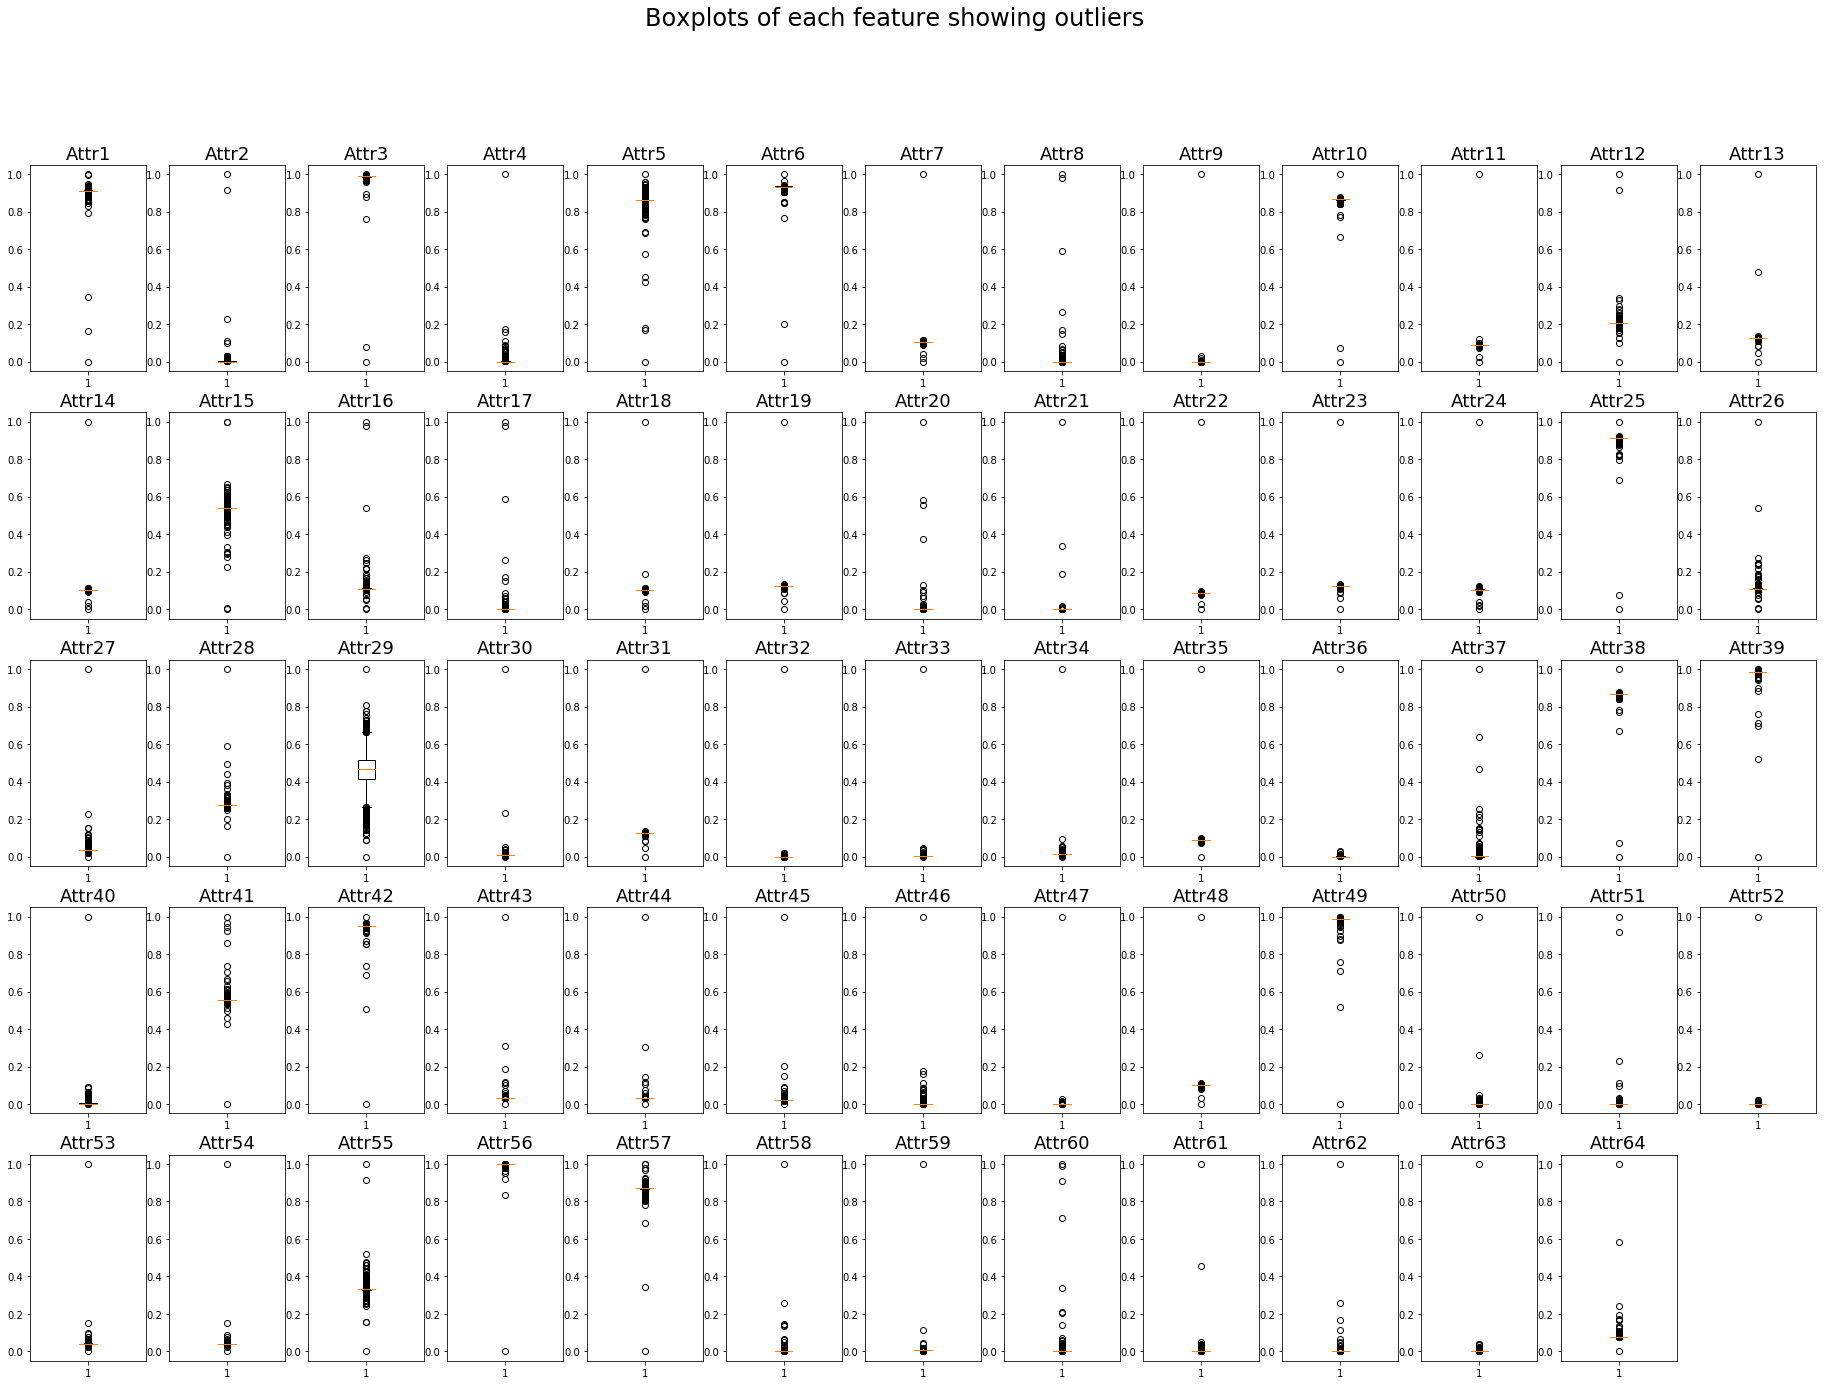

In [53]:
plt.figure(figsize=(32,22))
plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
for i in range(1,df_scaled.shape[1]+1):
    plt.subplot(5,13,i)
    plt.boxplot(df_scaled.iloc[:,i-1])
    plt.title(df_scaled.columns[i-1],fontsize=18)

In [54]:
def winsorize_series(s):
    q = s.quantile([0.05, 0.95])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_df(new_df):
    return new_df.apply(winsorize_series, axis=0)

In [58]:
N = winsorize_df(skew_df_scaled)

In [59]:
N

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.322983,0.011637,0.013458,0.750816,...,0.579670,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.322530,0.011069,0.011092,0.750745,...,0.575582,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.323122,0.014547,0.015327,0.751664,...,0.575818,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.323050,0.010558,0.014099,0.750486,...,0.575438,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.322672,0.012643,0.013307,0.751112,...,0.578122,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552
5,0.836007,0.033885,0.978749,0.018668,0.741525,0.874901,0.323056,0.011378,0.013982,0.750875,...,0.576512,0.995336,0.756734,0.009445,0.088852,0.003494,0.010848,0.016320,0.012494,0.277556
6,0.833047,0.031343,0.978731,0.018594,0.741150,0.873560,0.322848,0.012087,0.014741,0.751130,...,0.576703,0.995316,0.756188,0.009533,0.088806,0.002044,0.017059,0.016312,0.012555,0.277557
7,0.835448,0.030870,0.979160,0.019928,0.741554,0.873560,0.323002,0.012232,0.016946,0.751174,...,0.575515,0.995373,0.756486,0.009308,0.088799,0.003484,0.013063,0.016046,0.015028,0.277677
8,0.831399,0.012900,0.980337,0.042669,0.741866,0.873560,0.322650,0.026007,0.011232,0.752328,...,0.577929,0.995322,0.755863,0.009522,0.088802,0.004713,0.034885,0.015599,0.031758,0.277554
9,0.829873,0.038469,0.977726,0.015325,0.741182,0.873560,0.322469,0.010381,0.013541,0.750382,...,0.575236,0.995330,0.755791,0.009495,0.088967,0.003482,0.012404,0.016509,0.011387,0.277505


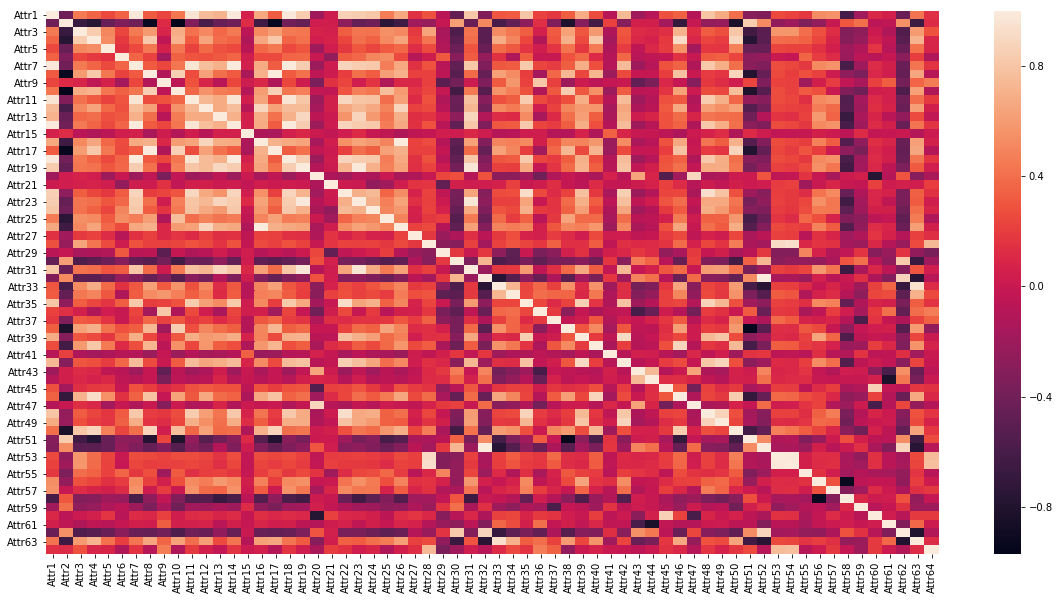

In [60]:
corr_v=N.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_v)